# Feature Engineering and modelling

## Import Packages

In [71]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

It is used in Python to suppress specific warning messages, particularly those of the type FutureWarning.

A FutureWarning is a type of warning in Python that tells you a certain feature or behavior is going to change in the future (usually in a future version of a library or Python itself).

It's not an error, and your code will still run, but it's meant to warn developers so they can prepare for future changes.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

## Load Data

In [73]:
df = pd.read_csv(r"C:\Users\hanan\Downloads\clean_data_after_eda.csv")
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

#date_activ = date of activation of the contract
#date_end = registered date of the end of the contract
#date_modif_prod = date of the last modification of the product
#date_renewal = date of the next contract renewal

In [74]:
df.head(4)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000,0


## Feature Engineering

### Difference between off-peak prices in December and preceding January

In [75]:
price= pd.read_csv(r"C:\Users\hanan\Downloads\price_data (1).csv")
price["price_date"] = pd.to_datetime(price["price_date"], format='%Y-%m-%d')
price.head()
#price_date = reference date

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [76]:
#price_off_peak_var = price of energy for the 1st period (off peak)
#price_off_peak_fix = price of power for the 1st period (off peak)

#Group off-peak prices by companies and month
monthly_price_by_id=price.groupby(['id','price_date']).agg({
    "price_off_peak_var":'mean',
    'price_off_peak_fix':'mean'}).reset_index()

monthly_price_by_id.head()
#Group the data by each combination of id and price_date.
#Apply aggregation functions (like mean, sum, etc.) to each group.
#Here, For each group, compute the mean of the price_off_peak_var values.
#After groupby, the grouped columns (id, price_date) become the index of the resulting DataFrame.
#reset_index() converts these index columns back to normal columns.

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885


In [77]:
#Get january and december prices

monthly_price_by_id = monthly_price_by_id.sort_values(['id', 'price_date'])
jan = monthly_price_by_id.groupby('id').first().reset_index()
jan.head()

#This groups the data by id.
#Then, for each id, it returns the first row (based on the row order in the DataFrame).

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931


In [78]:
dec = monthly_price_by_id.groupby('id').last().reset_index()
dec.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930


In [79]:
#Calculate the difference
diff = pd.merge(dec.rename(columns={
    'price_off_peak_var':'dec1',
    'price_off_peak_fix':'dec2'}), jan.drop(columns='price_date').rename(columns={
    'price_off_peak_var':'jan1',
    'price_off_peak_fix':'jan2'}),on='id')
diff.head()
#'prices_off_peak_var'-energy → 'dec1'
#'prices_off_peak_fix'-power → 'dec2'
#merge based on id
#This helps differentiate December and January prices after merging.

,id,price_date,dec1,dec2,jan1,jan2
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931


In [80]:
diff['offpeak_diff_energy'] = diff['dec1'] - diff['jan1']
diff['offpeak_diff_power'] = diff['dec2'] - diff['jan2']
diff = diff[['id','offpeak_diff_energy','offpeak_diff_power']]
diff.head()

,id,offpeak_diff_energy,offpeak_diff_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [81]:
df = pd.read_csv(r"C:\Users\hanan\Downloads\client_data (1).csv")
df=pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,offpeak_diff_energy,offpeak_diff_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,-0.006192,0.162916


# Average price changes across periods

In [82]:
#aggregate average prices per period by company
mean_prices = price.groupby(['id']).agg({
'price_off_peak_var':'mean',
'price_peak_var':'mean',
'price_mid_peak_var' :'mean',
'price_off_peak_fix' : 'mean',
'price_peak_fix':'mean',
'price_mid_peak_fix':'mean'}).reset_index()
mean_prices.head()

#price_off_peak_var = price of energy for the 1st period (off peak)
#price_peak_var = price of energy for the 2nd period (peak)
#price_mid_peak_var = price of energy for the 3rd period (mid peak)
#price_off_peak_fix = price of power for the 1st period (off peak)
#price_peak_fix = price of power for the 2nd period (peak)
#price_mid_peak_fix = price of power for the 3rd period (mid peak)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [83]:
# Calculate the mean difference between consecutive periods
#off_peak - peak
mean_prices['1_2_diff_energy'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['1_2_diff_power'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']

#peak - mid_peak 
mean_prices['2_3_diff_energy'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['2_3_diff_power'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']

#off_peak - mid_peak
mean_prices['1_3_diff_energy'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['1_3_diff_power'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

mean_prices.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,1_2_diff_energy,1_2_diff_power,2_3_diff_energy,2_3_diff_power,1_3_diff_energy,1_3_diff_power
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.020545,16.280694,0.030633,8.140345,0.051178,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.146426,44.385450,0.000000,0.000000,0.146426,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.181558,45.319710,0.000000,0.000000,0.181558,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0.020465,16.258972,0.029260,8.129484,0.049725,24.388456
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.147926,44.266930,0.000000,0.000000,0.147926,44.266930


In [84]:
columns = ['id',
           '1_2_diff_energy','2_3_diff_energy',
           '1_3_diff_energy','1_2_diff_power',
           '2_3_diff_power' ,'1_3_diff_power'
          ]
df = pd.merge(df, mean_prices[columns],on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,offpeak_diff_energy,offpeak_diff_power,1_2_diff_energy,2_3_diff_energy,1_3_diff_energy,1_2_diff_power,2_3_diff_power,1_3_diff_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,13.800,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,13.856,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,13.200,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,19.800,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


The Dec–Jan difference captures macroeconomic or seasonal shifts (e.g., policy changes, weather impacts, or demand cycles) across an entire year.

In contrast, intra-year or inter-time-period features (like differences between off_peak and peak prices within a month) can capture micro-level patterns such as:

Daily usage behavior
Seasonal short-term price spikes
Demand response effects

# Max price changes across periods and months

In [85]:
#aggregate average prices per period by company
mean_prices_by_month= price.groupby(['id','price_date']).agg({
'price_off_peak_var':'mean',
'price_peak_var':'mean',
'price_mid_peak_var' :'mean',
'price_off_peak_fix' : 'mean',
'price_peak_fix':'mean',
'price_mid_peak_fix':'mean'}).reset_index()
mean_prices_by_month.head()

#price_off_peak_var = price of energy for the 1st period (off peak)
#price_peak_var = price of energy for the 2nd period (peak)
#price_mid_peak_var = price of energy for the 3rd period (mid peak)
#price_off_peak_fix = price of power for the 1st period (off peak)
#price_peak_fix = price of power for the 2nd period (peak)
#price_mid_peak_fix = price of power for the 3rd period (mid peak)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555


In [86]:
# Calculate the mean difference between consecutive periods
#off_peak - peak
mean_prices_by_month['1_2_diff_energy'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['1_2_diff_power'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']

#peak - mid_peak 
mean_prices_by_month['2_3_diff_energy'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['2_3_diff_power'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

#off_peak - mid_peak
mean_prices_by_month['1_3_diff_energy'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['1_3_diff_power'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

mean_prices_by_month.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,1_2_diff_energy,1_2_diff_power,2_3_diff_energy,2_3_diff_power,1_3_diff_energy,1_3_diff_power
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.022123,16.226389,0.033743,8.113192,0.055866,24.339581
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.022123,16.226389,0.033743,8.113192,0.055866,24.339581
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.022225,16.291555,0.032069,8.145775,0.054294,24.437330
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.022225,16.291555,0.032069,8.145775,0.054294,24.437330
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.022225,16.291555,0.032069,8.145775,0.054294,24.437330


In [87]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    '1_2_diff_energy': 'max',
    '2_3_diff_energy': 'max',
    '1_3_diff_energy': 'max',
    '1_2_diff_power': 'max',
    '2_3_diff_power': 'max',
    '1_3_diff_power': 'max'
}).reset_index().rename(
    columns={
        '1_2_diff_energy': '1_2_diff_energy_max_diff',
        '2_3_diff_energy': '2_3_diff_energy_max_diff',
        '1_3_diff_energy': '1_3_diff_energy_max_diff',
        '1_2_diff_power': '1_2_diff_power_max_diff',
        '2_3_diff_power': '2_3_diff_power_max_diff',
        '1_3_diff_power': '1_3_diff_power_max_diff'
    }
)

In [88]:
columns = ['id','1_2_diff_energy_max_diff',
           '2_3_diff_energy_max_diff','1_3_diff_energy_max_diff',
           '1_2_diff_power_max_diff','2_3_diff_power_max_diff',
           '1_3_diff_power_max_diff'
          ]

df=pd.merge(df,max_diff_across_periods_months[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,1_3_diff_energy,1_2_diff_power,2_3_diff_power,1_3_diff_power,1_2_diff_energy_max_diff,2_3_diff_energy_max_diff,1_3_diff_energy_max_diff,1_2_diff_power_max_diff,2_3_diff_power_max_diff,1_3_diff_power_max_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


Calculating the maximum price change between months and time periods could be a good feature to create because customers might be more likely to churn if they experience sudden large price changes.

# Tenure

How long a company has been a client of PowerCo.

In [89]:
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end']   = pd.to_datetime(df['date_end'])

df['tenure'] = ((df['date_end'] - df['date_activ']).dt.days// 365)
df.head()
#date_activ = date of activation of the contract
#date_end = registered date of the end of the contract

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,1_2_diff_power,2_3_diff_power,1_3_diff_power,1_2_diff_energy_max_diff,2_3_diff_energy_max_diff,1_3_diff_energy_max_diff,1_2_diff_power_max_diff,2_3_diff_power_max_diff,1_3_diff_power_max_diff,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471,6
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471,6
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733,6


In [90]:
df.groupby(['tenure']).agg({'churn':'mean'}).sort_values(by='tenure', ascending = False)

,churn
tenure,
13,0.095238
12,0.083333
11,0.059783
10,0.045455
9,0.012500
8,0.047244
7,0.075472
6,0.075407
5,0.091999


We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

This is an interesting feature to keep for modelling because tenure is clearly correlated with churn probability.

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [91]:
def convert_months(reference_date, df, column):
    dates = pd.to_datetime(df[column])

    year_diff = reference_date.year - dates.dt.year
    month_diff = reference_date.month - dates.dt.month
    
    #intial month count
    months = year_diff*12 + month_diff

    # subtract 1 if the reference day hasn't been reached yet in that month
    months-=(reference_date.day < dates.dt.day).astype(int)
    #Reference date: 2025-08-02, Row date: 2025-05-15
    #Still August 2nd, so May 15 to August 2 = 2 full months, not 3.
    return months

In [92]:
reference_date = datetime(2016, 1, 1)

df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

### months_activ — Customer Lifetime
Definition: Months between reference_date (e.g., model training date) and date_activ (activation date).

Intuition:
Longer tenure = more loyal customer,
Newer customers = higher churn risk (still evaluating service)

### months_to_end — Contract End Proximity
Definition: Months between date_end (contract end) and reference_date.

Intuition:
Contracts nearing expiration may result in higher churn likelihood,
Natural breakpoints invite competitor switching

### months_modif_prod — Time Since Product Modification
Definition: Months between date_modif_prod (last product modification) and reference_date.

Intuition:
Recent modification = user is actively managing their plan,
Indicates engagement and satisfaction, reducing churn likelihood

### months_renewal — Time Since Last Renewal
Definition: Months between date_renewal (last contract renewal) and reference_date.

Intuition:
Renewed contracts may indicate long-term intent,
Recency of renewal may correlate with reduced churn

In [93]:
remove = ['date_activ','date_end','date_modif_prod','date_renewal']
df = df.drop(columns = remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,2_3_diff_energy_max_diff,1_3_diff_energy_max_diff,1_2_diff_power_max_diff,2_3_diff_power_max_diff,1_3_diff_power_max_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,6,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,8,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,4,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,3,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,71,3,71,9


# Transforming Boolean Data

Tranform categorical to binary

In [94]:
df['has_gas'] =df['has_gas'].replace(['t','f'],[1,0])
df.groupby(['has_gas']).agg({'churn':'mean'})

,churn
has_gas,
0,0.100544
1,0.081856


Customers who buy multiple products from PowerCo may have higher switching costs, and therefore could be more loyal. Given that customers who buy gas are 2% less likely to churn, this appears to be an important feature.

# Transforming categorical data
A predictive model cannot accept categorical or `string` values, so these variables need to be transformed before they can be used in modeling. 

### Label Encoding
One method is to map each category to an integer (label encoding): A → 0, B → 1, C → 2
While simple, this approach can introduce unintended ordinal relationships — implying A < B < C, which may not be true for features like region, product type, or color.
Use label encoding only when:
The categories have a natural order ( "Low", "Medium", "High")
You’re using tree-based models (like XGBoost or Random Forest), which can handle this well

### One - Hot Encoding (Dummy Variable)
This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category. 
| product\_type |   product\_type\_electricity | product\_type\_gas |
| ------------- |   -------------------------- | ------------------ |
| gas           |   0                          | 1                  |
| electricity   |   1                          | 0                  |
This avoids false ordinal assumptions and works well with linear models and most ML algorithms.

### Preventing Sparse Features: Drop Rare Categories
Including dummy variables for very rare categories can:
Introduce noise, Increase feature dimensionality unnecessarily, Lead to overfitting. 
To prevent this, we will exclude any category that occurs fewer than 100 times in the dataset.

## Channel Sales and origin up

In [95]:
#origin_up = code of the electricity campaign the customer first subscribed to
#channel_sales = code of the sales channel

cols = ['channel_sales','origin_up']
min_count = 100

#get counts per category so we can filter out rare categories
value = {col: df[col].value_counts() for col in cols}
#Stores the result in a dictionary: {A:120,B:80,C:400}
df = pd.get_dummies(df, columns=cols, prefix=cols, dtype=int)
#Converts each unique category in cols into a new dummy column.
#The new column is named like origin_up_A, origin_up_B, etc.
#prefix=cols makes sure the column name includes the original column name.
#dtype=int ensures the dummy values are integers (0 or 1) instead of booleans.
#origin_up = A → origin_up_A = 1, origin_up_B = 0, origin_up_C = 0

In [96]:
for col in cols:
    keep_cols = set(value[col][value[col] >= min_count].index.astype(str))
    #value_counts[col] >= min_count → Filters out rare categories.
    #.index → Gets the category names (e.g., 'A', 'B')
    #.astype(str) → Ensures all category names are strings (important for string matching later).
    #set(...) → Converts list of valid categories into a set for fast lookups.
    dummy_cols = [c for c in df.columns if c.startswith(f'{col}_')]
    #Collect all one-hot encoded columns for this base column
    #['origin_up_A', 'origin_up_B', 'origin_up_C']
    drop_cols = [c for c in dummy_cols if c.split(f'{col}_', 1)[1] not in keep_cols]
    #Splits the dummy column name at the prefix (e.g., origin_up_)
    #Extracts just the category name (e.g., 'A')
    #Checks if that category is not in keep_cols.
    #If not → add it to drop_cols.
    df.drop(columns = drop_cols, inplace=True)
    #modifies in original DataFrame
    #A:120,B:80,C:400 -> B removed
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


# Transforming numerical data

### Why Skewness Matters in Predictive Modeling
Some numerical features are highly skewed, their values are not evenly distributed around the mean but are pushed toward one side , usually right-skewed with long tails.
While skewness is not always a problem, it can negatively impact parametric models, such as Linear Regression, Logistic Regression, Linear Discriminant Analysis
These models assume features follow a normal distribution and often perform best when features are Normally distributed and Independent
Skewed distributions can also cause Longer training times, Slower convergence and Overreliance on extreme outliers

To make the data more "normal", we can apply mathematical transformations to skewed features. Common transformations include:

| Transformation  | Use Case               |
| --------------- | ---------------------- |
| Square Root     | Mild positive skew     |
| Cubic Root      | Moderate skew          |
| **Logarithmic** | Strong positive skew   |


Logarithmic Transformation
We will use the logarithmic transformation (log(x + 1)) for the positively skewed variables because: It's effective at compressing long right tails
It improves symmetry. It’s easy to interpret (e.g., percentage-like behavior)

Note: Log(0) is undefined, so we will add +1 to every value before taking the log.

Expected Outcome
The distribution of the transformed variables will be closer to normal, The standard deviation should decrease, The model should become more stable and accurate, especially for algorithms sensitive to skew

In [97]:
skewed_cols = ['cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak']
print("Before log transform:")
print(df[skewed_cols].describe())

Before log transform:
           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   


In [98]:
df[skewed_cols] = np.log10(df[skewed_cols]+1)
#Adds 1 to each value to avoid taking log10(0), which is undefined.
#Applies the base-10 logarithm to compress large values and reduce skew.
print("After log transform:")
print(df[skewed_cols].describe())

After log transform:
           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.050918                 1.517203   
std              1.584986                  0.267388                 0.571481   
m

The standard deviation (spread) of most features has decreased
The distributions have become more symmetric, reducing skewness
This generally leads to more stable and predictable input features for machine learning models.

Hence,

Reduced Variability: A lower standard deviation indicates that the values are more tightly clustered around the mean, which helps the model generalize better.

Improved Model Convergence: Parametric models (like Logistic Regression) and gradient-based algorithms (like Neural Networks) often train faster and more reliably when input distributions are more uniform and centered.

Better Feature Scaling: Log transformation naturally reduces the impact of outliers, which can dominate learning in raw scale

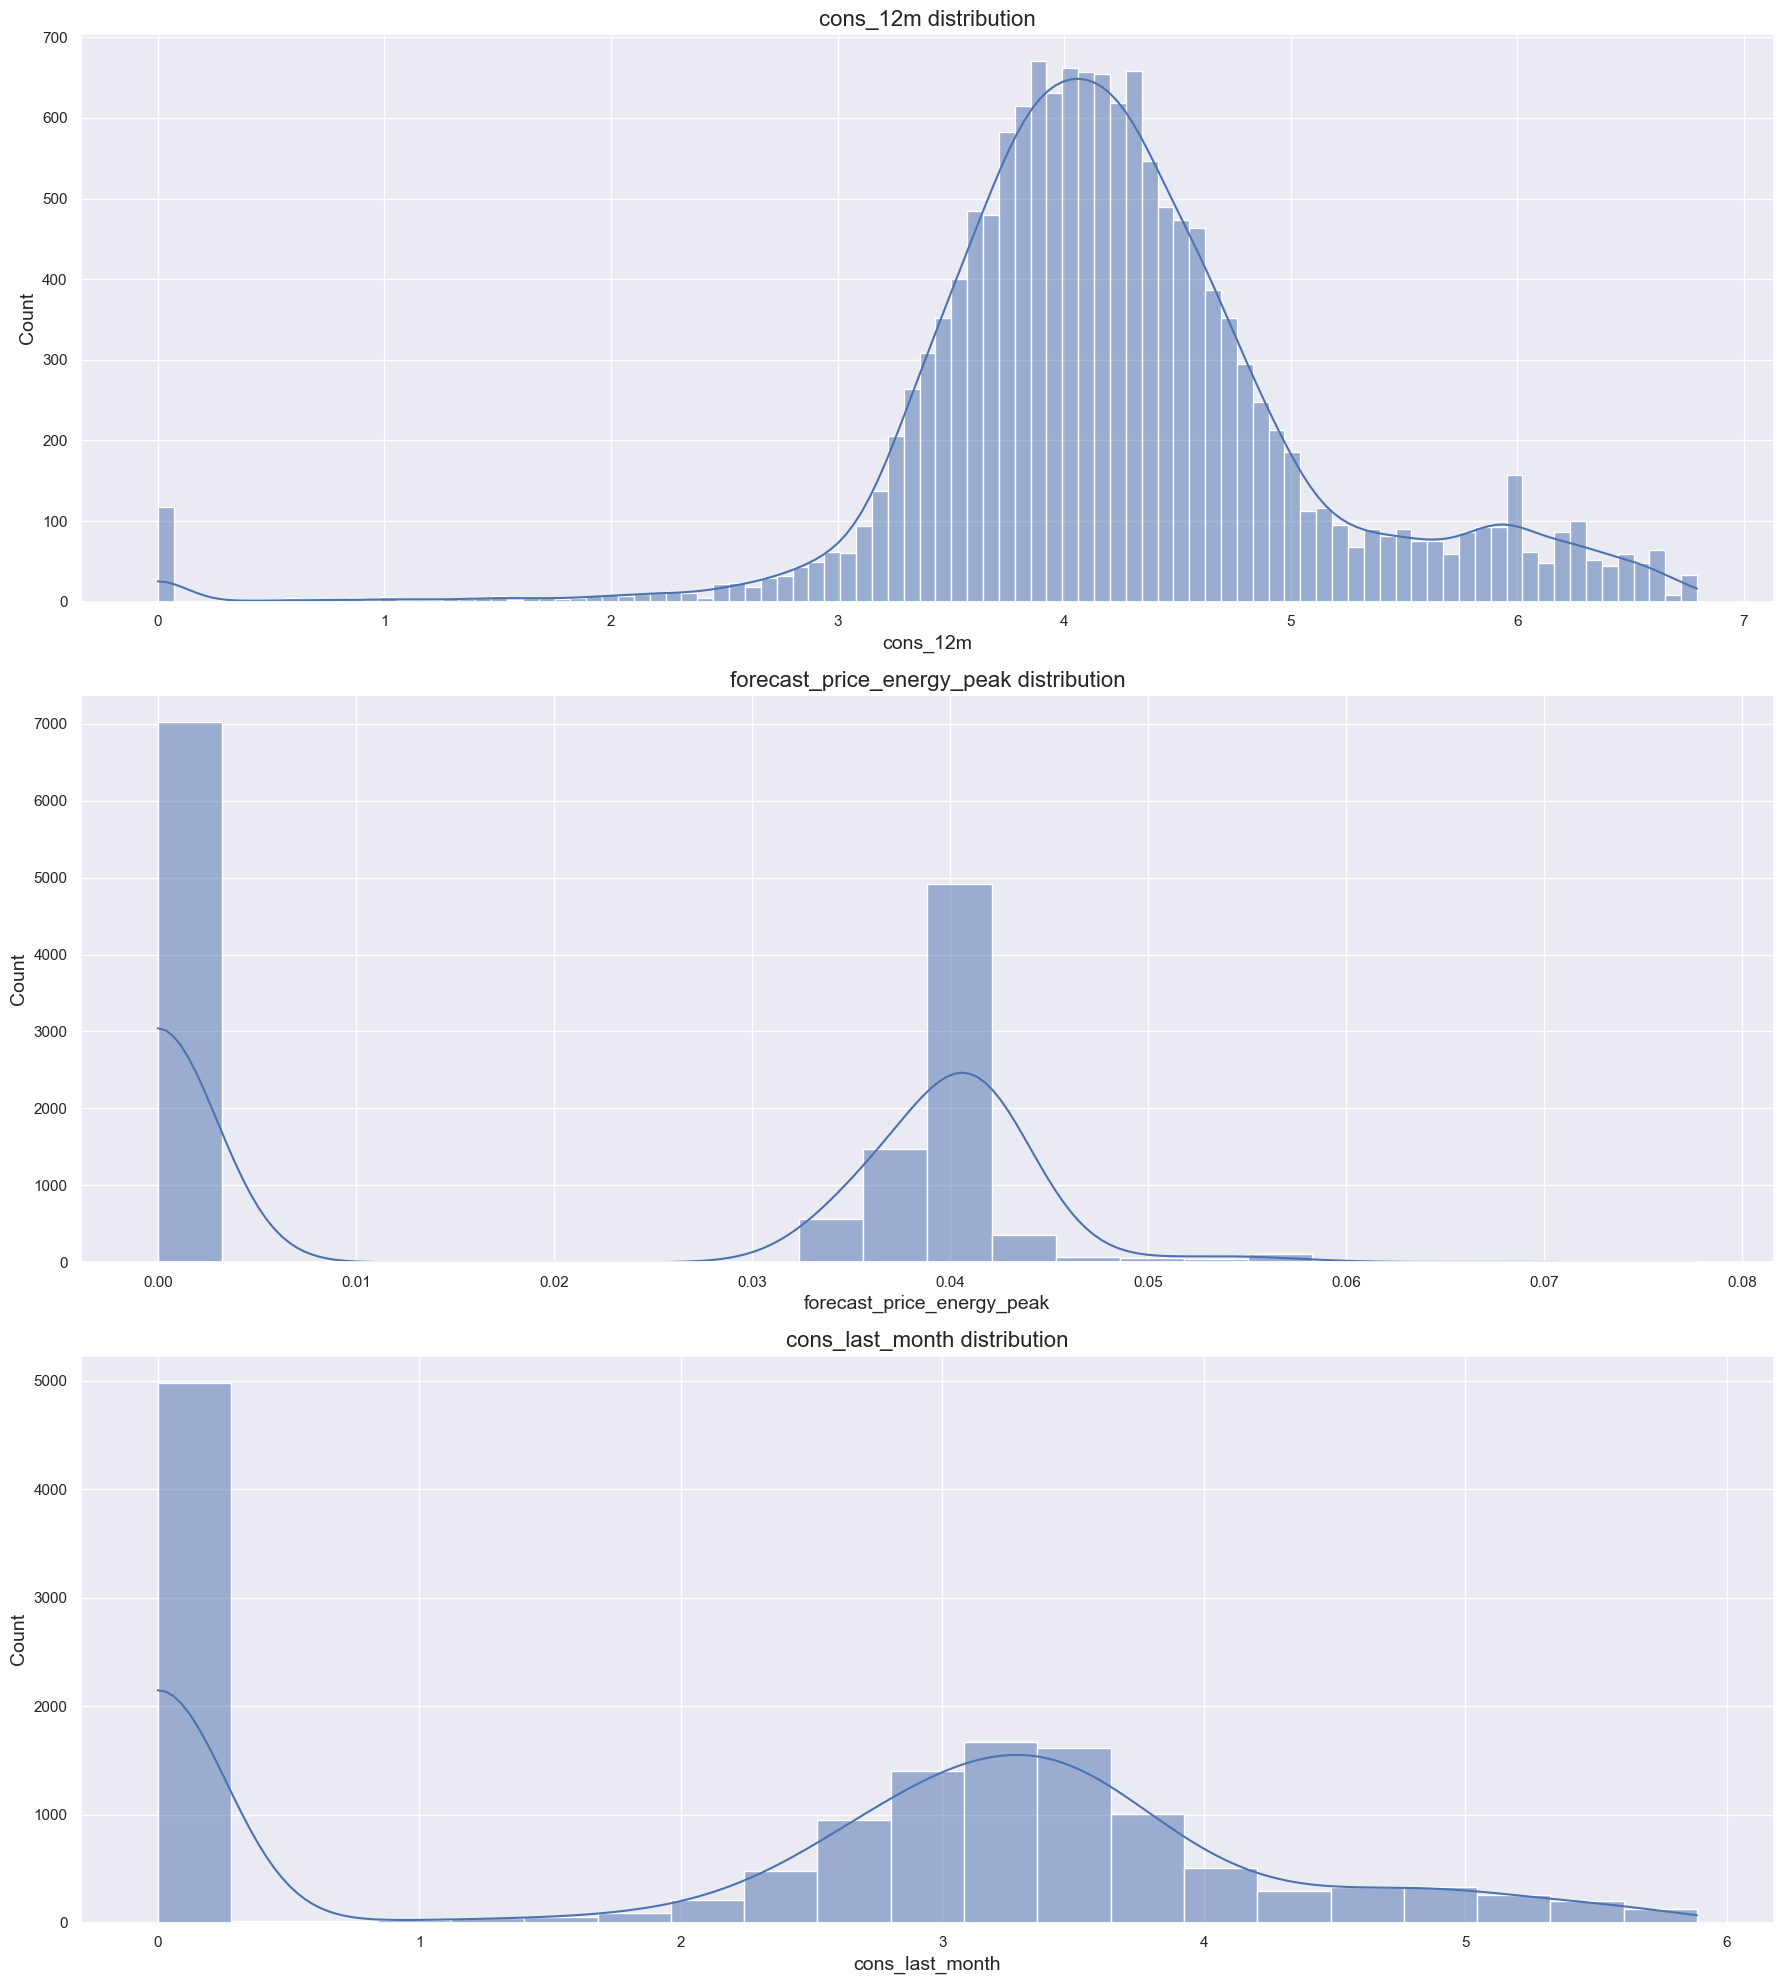

In [99]:
cols = ['cons_12m','forecast_price_energy_peak','cons_last_month']

#Set up subplots
fig, axs = plt.subplots(nrows=len(cols), figsize=(18,20))

#loop through each column and plot 
for ax, col in zip(axs,cols):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    #.dropna(): Removes any NaN (missing) values so they don't interfere with the plot.
    #kde=True: Adds a smooth curve to visualize density
    #ax=ax: Ensures it goes into a specified subplot (useful for multiple plots)
    ax.set_title(f"{col} distribution", fontsize = 16)
    ax.set_xlabel(col, fontsize = 14)
    ax.set_ylabel("Count", fontsize = 14)

plt.tight_layout()
plt.show()

In [100]:
df.head()
#normalised values

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.059075,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.066622,0.036589,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.059448,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.048014,0.041399,...,71,9,1,0,0,0,0,1,0,0


# Correlation

Feature engineering is iterative, and understanding correlation helps you decide which features to keep, drop, or refine.
Values between 0.1 and -0.1

### Check Correlation with the Target Variable
Helps you understand whether a feature is predictive of the outcome. If a feature has little to no correlation with the target, it may not add value. Positive or negative correlation (linear or non-linear) may indicate predictive power.

### Check for Multicollinearity (Correlation Between Features)
Highly correlated features can:
Inflate variance in linear models, Confuse tree-based models by introducing redundant splits and Make your model less generalizable

To reduce multicollinearity:
Keep only one of the highly correlated features and Use domain knowledge or feature importance to choose

In [107]:
correlation = df.drop(columns = ['id']).corr()
#id is just an identifier, not a numerical feature 
#So, including it in correlation analysis would be meaningless.
#.corr()
#This computes the correlation matrix for all numeric columns in the DataFrame.
#The result is a square matrix where:
#Rows and columns are feature names.
#Each cell represents the Pearson correlation coefficient between two features.
#By default, df.corr() uses Pearson correlation, which measures linear relationships between numeric variables.

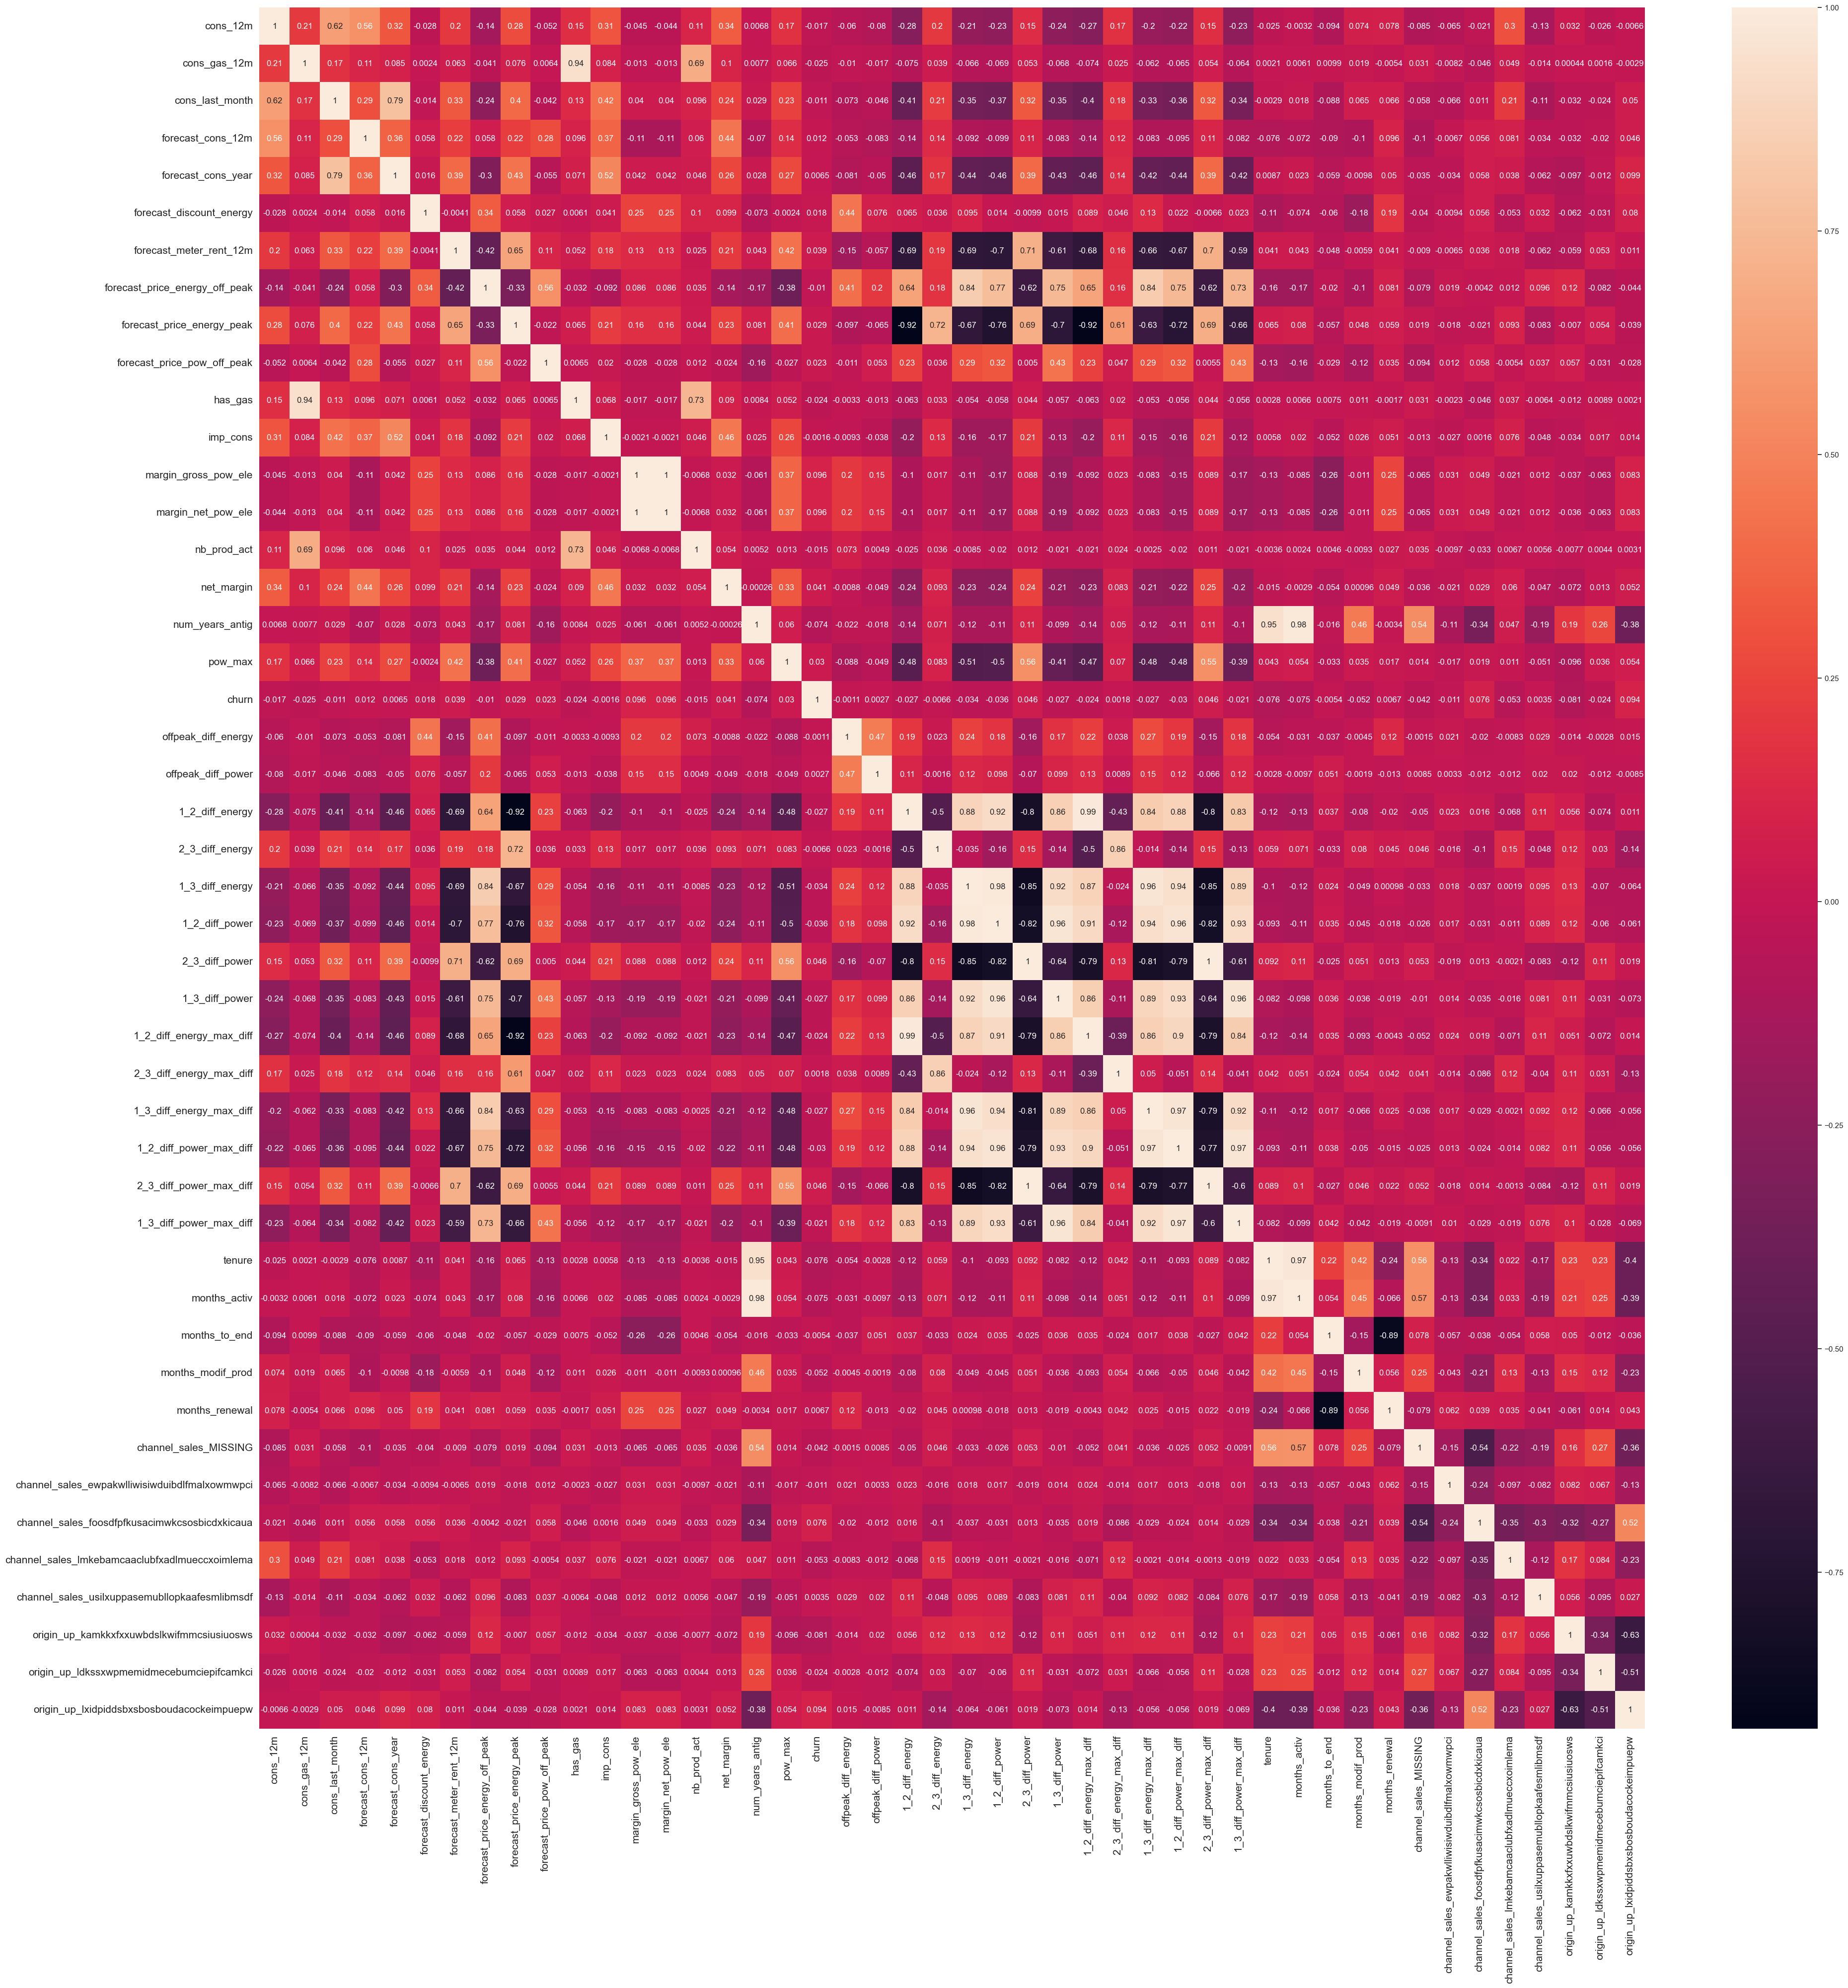

In [104]:
# plot correlation
plt.figure(figsize=(45,45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size':12}
)
#Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Look at Correlation with Target Variable (churn)
rule of thumb: |correlation| ≥ 0.1

months_activ → correlation ≈ -0.17 -> Keep 
pow_max → correlation ≈ 0.16 -> Keep
origin_up_...camkci → correlation ≈ 0.19 -> Keep

### Check for Multicollinearity (Feature-to-Feature)
forecast_cons_12m ⬌ forecast_cons_year → > 0.9 
num_years_antig ⬌ Similar to months_activ, lower value

In [105]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,1.619163,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,1.656207,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,1.656207,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,1.656207,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,1.619163,...,71,9,1,0,0,0,0,1,0,0
